## Import Libraries

In [2]:
import os
import tensorflow as tf
import numpy as np

## Splitting Folders in Train Test Valid

In [2]:
 !pip install split-folders

In [8]:
import splitfolders
splitfolders.ratio('C:/Users/asad/practice/Face', output="C:/Users/asad/practice/FaceTTS", seed=1337, ratio=(.7, 0.2,0.1))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  6.28 files/s]
Copying files: 60 files [00:00, 281.28 files/s]
Copying files: 140 files [00:00, 486.67 files/s]
Copying files: 223 files [00:00, 608.83 files/s]
Copying files: 303 files [00:00, 673.06 files/s]
Copying files: 377 files [00:00, 692.18 files/s]
Copying files: 458 files [00:00, 695.63 files/s]
Copying files: 556 files [00:00, 746.31 files/s]
Copying files: 642 files [00:00, 778.01 files/s]
Copying files: 745 files [00:01, 814.81 files/s]
Copying files: 827 files [00:01, 815.21 files/s]
Copying files: 909 files [00:01, 788.08 files/s]
Copying files: 991 files [00:01, 786.48 files/s]
Copying files: 1082 files [00:01, 788.04 files/s]
Copying files: 1161 files [00:01, 784.65 files/s]
Copying files: 1242 files [00:01, 758.23 files/s]
Copying files: 1318 files [00:01, 755.35 files/s]
Copying files: 1399 files [00:01, 768.90 files/s]
Copying files: 1497 files [00:02, 794.26 files/s]
Copying files: 1577 file

## Checking for Classes

In [3]:
path = "C:/Users/asad/practice/Face"
listofclass=os.listdir(path)

In [4]:
listofclass

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

## Image Pre-Processing

In [5]:
#dataset_path = "C:/Users/asad/practice/CatsAndDogsTTS"
TRAINING_DATA_DIR="C:/Users/asad/practice/FaceTTS/train"
#VALID_DATA_DIR="C:/Users/asad/practice/CatsAndDogsTTS/val"
Test_Data_DIR="C:/Users/asad/practice/FaceTTS/test"
Val_Data_DIR="C:/Users/asad/practice/FaceTTS/val"

In [6]:
IMAGE_SHAPE = (224,224)

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                featurewise_center=False, #set input mean to 0
                                                                samplewise_center=False,  #set each sample mean to 0
                                                                featurewise_std_normalization=False, #divide input datas to std
                                                                samplewise_std_normalization=False,  #divide each datas to own std
                                                                zca_whitening=False,  #dimension reduction
                                                                rotation_range=0.5,    #rotate 5 degree
                                                                zoom_range=0.5,        #zoom in-out 5%
                                                                width_shift_range=0.5, #shift 5%
                                                                height_shift_range=0.5,
                                                                horizontal_flip=True,  #randomly flip images
                                                                vertical_flip=False,)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
class_mode='categorical',
shuffle=True,
target_size=IMAGE_SHAPE)

Found 20325 images belonging to 8 classes.


In [8]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                featurewise_center=False, #set input mean to 0
                                                                samplewise_center=False,  #set each sample mean to 0
                                                                featurewise_std_normalization=False, #divide input datas to std
                                                                samplewise_std_normalization=False,  #divide each datas to own std
                                                                zca_whitening=False,  #dimension reduction
                                                                rotation_range=0.5,    #rotate 5 degree
                                                                zoom_range=0.5,        #zoom in-out 5%
                                                                width_shift_range=0.5, #shift 5%
                                                                height_shift_range=0.5,
                                                                horizontal_flip=True,  #randomly flip images
                                                                vertical_flip=False)
valid_generator = valid_datagen.flow_from_directory(
Test_Data_DIR,
class_mode='categorical',
shuffle=True,
target_size=IMAGE_SHAPE
)

Found 2912 images belonging to 8 classes.


In [9]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                featurewise_center=False, #set input mean to 0
                                                                samplewise_center=False,  #set each sample mean to 0
                                                                featurewise_std_normalization=False, #divide input datas to std
                                                                samplewise_std_normalization=False,  #divide each datas to own std
                                                                zca_whitening=False,  #dimension reduction
                                                                rotation_range=0.5,    #rotate 5 degree
                                                                zoom_range=0.5,        #zoom in-out 5%
                                                                width_shift_range=0.5, #shift 5%
                                                                height_shift_range=0.5,
                                                                horizontal_flip=True,  #randomly flip images
                                                                vertical_flip=False)
test_generator = test_datagen.flow_from_directory(
Test_Data_DIR,
class_mode='categorical',
shuffle=True,
target_size=IMAGE_SHAPE
)

Found 2912 images belonging to 8 classes.


In [10]:
print(train_generator.class_indices)

{'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}


## Architecture

In [17]:
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Kagle MobileVnet2 Model

In [18]:
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
# pre_trained= MobileNetV2(include_top=False, pooling='avg', input_shape=(224,224,3))

# #for layers in pre_trained.layers:
# #    layers.trainable=False
# pre_trained.trainable=False

# inp_model = pre_trained.input
# #x=Flatten()(pre_trained.output)
# x=Dense(128, activation='relu')(pre_trained.output)
# x=Dropout(0.5)(x)
# x=Dense(128, activation='relu')(x)
# output=Dense(8, activation='softmax')(x)
# model = Model(inputs=inp_model, outputs=output)




# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])


## Pre-Trained VGG16 Model

In [42]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

model=tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=9,
    classifier_activation='softmax'
)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## VGG 16 Model Self Trainable

In [ ]:
# model = tf.keras.models.Sequential([
#     #1st convo block
#     tf.keras.layers.Conv2D(64, (3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)),
#     tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
#     tf.keras.layers.MaxPool2D(pool_size = (2,2)),
#     tf.keras.layers.Dropout(0.2),
# #2nd convo bock
#     tf.keras.layers.Conv2D(128, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
#     tf.keras.layers.MaxPool2D(pool_size = (2,2)),
#     tf.keras.layers.Dropout(0.2),
#     #3rd convo block
#     tf.keras.layers.Conv2D(256, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
#     tf.keras.layers.MaxPool2D(pool_size = (2,2)),
#     tf.keras.layers.Dropout(0.2),
# #4th conco block
#     tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),

#     tf.keras.layers.MaxPool2D(pool_size =(2,2)),
#     tf.keras.layers.Dropout(0.2),
#     #5th convo block
    
#     tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
#     tf.keras.layers.MaxPool2D(pool_size =(2,2)),
    

#     tf.keras.layers.Flatten(),

#     # tf.keras.layers.Dense(4096,activation='relu'),
#     # # tf.keras.layers.Dropout(0.6),
#     # tf.keras.layers.Dense(4096,activation='relu'),
#     # # tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Dense(64),
#     tf.keras.layers.Dropout(0.2),
#     #For Binary Classes (i.e. Cats&Dogs)
#     tf.keras.layers.Dense(9, activation='softmax')
#     #For Multi-Class (i.e. Cats&Dogs&Birds....)
#     # tf.keras.layers.Dense(3, activation='softmax')
# ])

## RESNET152 Architecture

In [36]:
from tensorflow.keras import Model,layers,losses

In [31]:
# base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
# for layer in base_model.layers:
#   layer.trainable = False

In [43]:
x = layers.Flatten()(base_model.output)

x = layers.Dense(1024, activation='relu')(x)

predictions = layers.Dense(8, activation = 'softmax')(x)

In [44]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])

In [45]:
# head_model.summary()

## Optimizer Function

In [ ]:
# from tensorflow.keras.optimizers import Adam

# optimizer = "Adam"
# model.compile(
#  optimizer=optimizer,
#  loss="categorical_crossentropy",
#  #For MultiClass use categorical_crossentropy
#  #For Binary Class use binary_crossentropy

#  metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=8)

history = head_model.fit(train_generator, validation_data=valid_generator, epochs=40, callbacks=callback).history

Epoch 1/40
636/636 [==============================] - 348s 534ms/step - loss: 2.7019 - accuracy: 0.1613 - val_loss: 2.0599 - val_accuracy: 0.1751
Epoch 2/40
636/636 [==============================] - 337s 530ms/step - loss: 2.0554 - accuracy: 0.1755 - val_loss: 2.0388 - val_accuracy: 0.1789
Epoch 3/40
636/636 [==============================] - 342s 538ms/step - loss: 2.0403 - accuracy: 0.1783 - val_loss: 2.0356 - val_accuracy: 0.1813
Epoch 4/40
636/636 [==============================] - 341s 536ms/step - loss: 2.0367 - accuracy: 0.1818 - val_loss: 2.0455 - val_accuracy: 0.1830
Epoch 5/40
636/636 [==============================] - 343s 539ms/step - loss: 2.0343 - accuracy: 0.1838 - val_loss: 2.0256 - val_accuracy: 0.1885
Epoch 6/40
636/636 [==============================] - 57161s 90s/step - loss: 2.0340 - accuracy: 0.1831 - val_loss: 2.0331 - val_accuracy: 0.1927
Epoch 7/40
287/636 [============>.................] - ETA: 2:53 - loss: 2.0341 - accuracy: 0.1834

In [13]:
len(train_generator.next())

2

## Import CV2 for image filters and PIL to show image

In [4]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Blur filter using CV2

In [ ]:
p1=cv2.imread('C:/Users/asad/practice/FaceTTS/train/anger/image0000060.jpg')
p1 = cv2.cvtColor(p1, cv2.COLOR_BGR2RGB)


In [ ]:
type(p1)   #Check image type

In [68]:
def blur_img(p1, k=9):
    blur = cv2.GaussianBlur(p1, (k,k), 0, 0)
    return blur

In [36]:
blur=blur_img(p1,3)

In [ ]:
disp=Image.fromarray(blur)

In [ ]:
disp.show()

## Canny Edge Filter

In [89]:
p2=cv2.imread("C:/Users/asad/practice/FaceTTS/train/anger/image0000061.jpg")
p2 = cv2.cvtColor(p2, cv2.COLOR_BGR2RGB)
img_edges = cv2.Canny(p2, 150, 300)

In [47]:
disp=Image.fromarray(img_edges)

In [48]:
disp.show()

In [51]:
type(disp)

PIL.Image.Image

## Canny & Image Blur Both

In [145]:
p3 = cv2.imread("C:/Users/asad/practice/FaceTTS/Train/anger/image0001527.jpg")
p3 = cv2.cvtColor(p3, cv2.COLOR_BGR2RGB)
img_blur=blur_img(p3,9)
#(T, threshInv) = cv2.threshold(p3, 150, 300,cv2.THRESH_BINARY_INV)# Binarization of image
img_edges = cv2.Canny(p3, 200, 300)


In [146]:
disp=Image.fromarray(img_edges)


## Show Multiple Images using Matplot

Text(0.5, 1.0, 'Original')

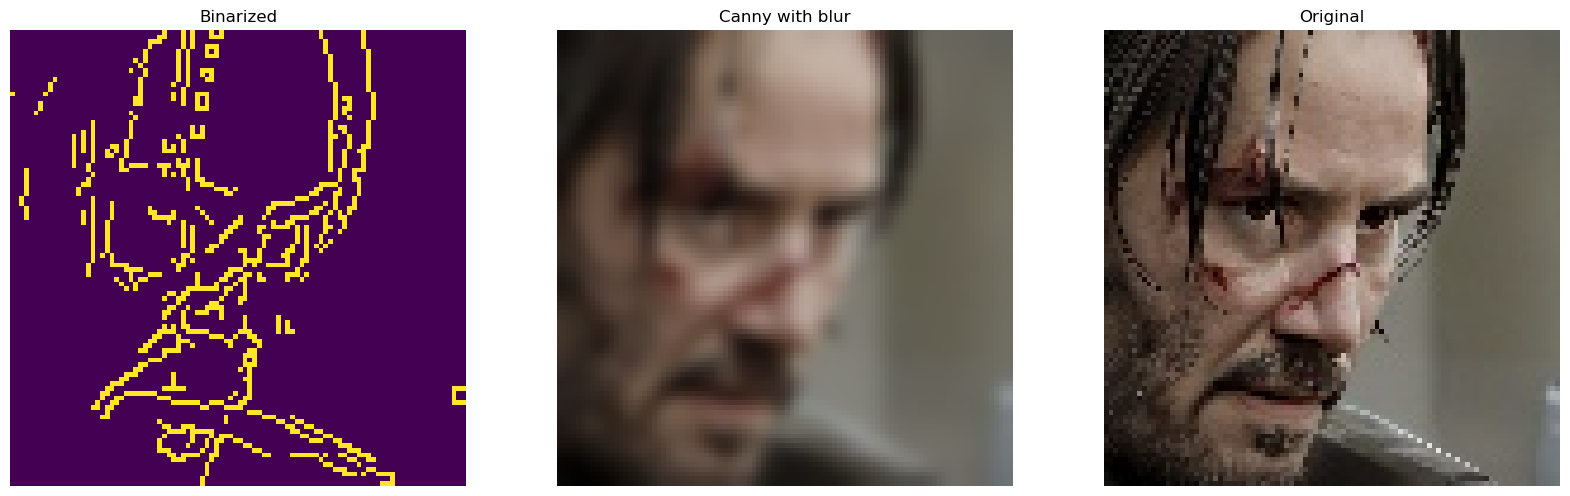

In [147]:
fig = plt.figure(figsize=(20,30)) 
fig.add_subplot(3, 3, 1)

plt.imshow(img_edges)
plt.axis("off")
plt.title("Binarized")

fig.add_subplot(3, 3, 2)
plt.imshow(img_blur)
plt.axis("off")
plt.title("Canny with blur")

fig.add_subplot(3, 3, 3)
plt.imshow(p3)
plt.axis("off")
plt.title("Original")


## Sharpening Filter

In [148]:
def sharping_filter(img, k=5):
    kernel = np.array([[ 0, -1,  0],
                       [-1,  k, -1],
                       [ 0, -1,  0]])
    img_sharp = cv2.filter2D(img, ddepth = -1, kernel = kernel)
    # Clip values to the range [0, 255].
    img_sharp = np.clip(img_sharp, 0, 255)
    return img_sharp

In [151]:
sharpen=sharping_filter(p3,5)


In [152]:
disp=Image.fromarray(sharpen)

Text(0.5, 1.0, 'Sharpen')

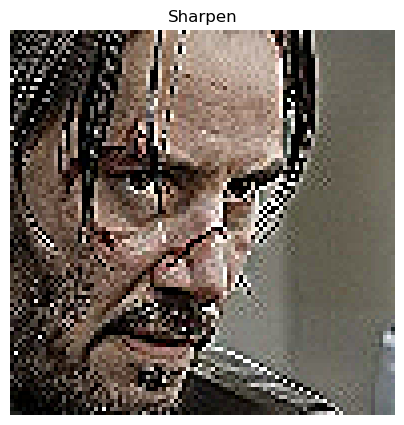

In [155]:
fig = plt.figure(figsize=(5,5)) 

plt.imshow(sharpen)
plt.axis("off")
plt.title("Sharpen")

## OutLine Filter

In [159]:
def outline(img, k = 9):
    
    k = max(k,9)
    kernel = np.array([[-1, -1, -1],
                       [-1,  k, -1],
                       [-1, -1, -1]])
    
    img_outline = cv2.filter2D(img, ddepth = -1, kernel = kernel)

    return img_outline

In [161]:
p4=cv2.imread("C:/Users/asad/practice/license.jpg")
p4= cv2.cvtColor(p4, cv2.COLOR_BGR2RGB)

In [162]:
outfilter=outline(p4,9)

In [163]:
disp=Image.fromarray(outfilter)

Text(0.5, 1.0, 'Original')

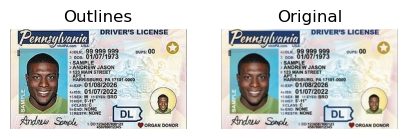

In [165]:
fig = plt.figure(figsize=(5,5)) 
fig.add_subplot(2,2,1)

plt.imshow(outfilter)
plt.axis("off")
plt.title("Outlines")

fig.add_subplot(2,2,2)

plt.imshow(p4)
plt.axis("off")
plt.title("Original")

In [171]:
n=cv2.cvtColor(outfilter, cv2.COLOR_RGB2BGR)
cv2.imwrite('C:/Users/asad/practice/licencecov.jpg',n)

True

## Exposure Filter

In [1]:
def bright(img, level):
    img_bright = cv2.convertScaleAbs(img, beta = level)
    return img_bright

In [5]:
p3 = cv2.imread("C:/Users/asad/practice/FaceTTS/Train/anger/image0001527.jpg")
p3 = cv2.cvtColor(p3, cv2.COLOR_BGR2RGB)

In [15]:
bri=bright(p3,75)

Text(0.5, 1.0, 'Original')

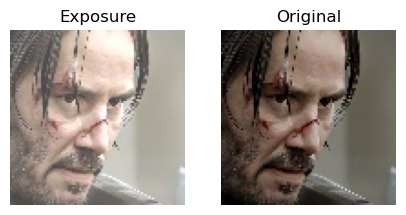

In [16]:
fig = plt.figure(figsize=(5,5)) 
fig.add_subplot(2,2,1)

plt.imshow(bri)
plt.axis("off")
plt.title("Exposure")

fig.add_subplot(2,2,2)

plt.imshow(p3)
plt.axis("off")
plt.title("Original")